<a href="https://colab.research.google.com/github/RaaviDeepak/Sentimental-analysis-of-social-media-presence/blob/main/POC(Group2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Loading

In [ ]:

import pandas as pd
import numpy as np

df = pd.read_csv('sentimentdataset1.csv')
print("Data Loaded Successfully!")



Data Loaded Successfully!


Data inspection

In [ ]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,...,sarcasm_indicator_scaled,emoji_text_disagreement_scaled,negation_shift_score_scaled,elongated_emphasis_score_scaled,punctuation_entropy_scaled,hashtag_sentiment_gap_scaled,emoticon_emoji_ratio_scaled,pronoun_self_other_ratio_scaled,subjectivity_contrast_scaled,allcaps_word_ratio_scaled
0,0,0,Enjoying a beautiful day at the park! ...,Positive,15-01-2023 12:30,User123,Twitter,#Nature #Park,15,30,...,0,0.0,0.0,1,-1.442823e-12,0.0,0.0,0.0,0.142320,0.0
1,1,1,Traffic was terrible this morning. ...,Negative,15-01-2023 08:45,CommuterX,Twitter,#Traffic #Morning,5,10,...,0,0.0,0.0,1,-1.442823e-12,0.0,0.0,0.0,0.523300,0.0
2,2,2,Just finished an amazing workout! 💪 ...,Positive,15-01-2023 15:45,FitnessFan,Instagram,#Fitness #Workout,20,40,...,0,0.0,0.0,1,1.000000e+00,0.0,0.0,0.0,0.338490,0.0
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,15-01-2023 18:20,AdventureX,Facebook,#Travel #Adventure,8,15,...,0,0.0,0.0,1,-1.442823e-12,0.0,0.0,0.0,0.449775,0.0
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,15-01-2023 19:55,ChefCook,Instagram,#Cooking #Food,12,25,...,0,0.0,0.0,1,-1.442823e-12,0.0,0.0,0.0,0.454545,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 45 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0.1                     732 non-null    int64  
 1   Unnamed: 0                       732 non-null    int64  
 2   Text                             732 non-null    object 
 3   Sentiment                        732 non-null    object 
 4   Timestamp                        732 non-null    object 
 5   User                             732 non-null    object 
 6   Platform                         732 non-null    object 
 7   Hashtags                         732 non-null    object 
 8   Retweets                         732 non-null    int64  
 9   Likes                            732 non-null    int64  
 10  Country                          732 non-null    object 
 11  Year                             732 non-null    int64  
 12  Month                 

In [ ]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Retweets,Likes,Year,Month,Day,Hour,emoji_count,hashtag_count,...,sarcasm_indicator_scaled,emoji_text_disagreement_scaled,negation_shift_score_scaled,elongated_emphasis_score_scaled,punctuation_entropy_scaled,hashtag_sentiment_gap_scaled,emoticon_emoji_ratio_scaled,pronoun_self_other_ratio_scaled,subjectivity_contrast_scaled,allcaps_word_ratio_scaled
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,...,732.0,732.0,732.000000,732.000000,7.320000e+02,732.000000,732.0,732.000000,732.000000,732.000000
mean,366.464481,369.740437,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858,0.015027,0.174863,...,0.0,0.0,0.004426,0.239071,8.044102e-01,-0.034989,0.0,0.015027,0.153817,0.000741
std,211.513936,212.428936,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414,0.121745,0.565320,...,0.0,0.0,0.058478,0.426808,6.057854e-01,0.161303,0.0,0.121745,0.189415,0.009734
min,0.000000,0.000000,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.0,0.0,-0.177900,0.000000,-1.442823e-12,-0.906200,0.0,0.000000,0.000000,0.000000
25%,183.750000,185.750000,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,-1.442823e-12,0.000000,0.0,0.000000,0.000000,0.000000
50%,366.500000,370.500000,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,1.000000e+00,0.000000,0.0,0.000000,0.085017,0.000000
75%,549.250000,553.250000,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,1.000000e+00,0.000000,0.0,0.000000,0.249400,0.000000
max,732.000000,736.000000,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000,1.000000,2.000000,...,0.0,0.0,1.012300,1.000000,2.321928e+00,0.790100,0.0,1.000000,1.000000,0.166667


Data Processing

In [ ]:
print("Columns:", df.columns.tolist())

Columns: ['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User', 'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month', 'Day', 'Hour', 'emoji_count', 'hashtag_count', 'mention_count', 'url_flag', 'excl_count', 'allcaps_ratio', 'negation_count', 'elongated_count', 'vader_compound', 'text_length_words', 'sarcasm_indicator', 'emoji_text_disagreement', 'negation_shift_score', 'elongated_emphasis_score', 'punctuation_entropy', 'hashtag_sentiment_gap', 'emoticon_emoji_ratio', 'pronoun_self_other_ratio', 'subjectivity_contrast', 'allcaps_word_ratio', 'sarcasm_indicator_scaled', 'emoji_text_disagreement_scaled', 'negation_shift_score_scaled', 'elongated_emphasis_score_scaled', 'punctuation_entropy_scaled', 'hashtag_sentiment_gap_scaled', 'emoticon_emoji_ratio_scaled', 'pronoun_self_other_ratio_scaled', 'subjectivity_contrast_scaled', 'allcaps_word_ratio_scaled']


In [ ]:
print("Shape:", df.shape)

Shape: (732, 45)


In [ ]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Unnamed: 0.1                       0
Unnamed: 0                         0
Text                               0
Sentiment                          0
Timestamp                          0
User                               0
Platform                           0
Hashtags                           0
Retweets                           0
Likes                              0
Country                            0
Year                               0
Month                              0
Day                                0
Hour                               0
emoji_count                        0
hashtag_count                      0
mention_count                      0
url_flag                           0
excl_count                         0
allcaps_ratio                      0
negation_count                     0
elongated_count                    0
vader_compound                     0
text_length_words                  0
sarcasm_indicator                  0
emoji_text_disagreeme

In [ ]:
print("\nData Types:")
print(df.dtypes)


Data Types:
Unnamed: 0.1                         int64
Unnamed: 0                           int64
Text                                object
Sentiment                           object
Timestamp                           object
User                                object
Platform                            object
Hashtags                            object
Retweets                             int64
Likes                                int64
Country                             object
Year                                 int64
Month                                int64
Day                                  int64
Hour                                 int64
emoji_count                          int64
hashtag_count                        int64
mention_count                        int64
url_flag                             int64
excl_count                           int64
allcaps_ratio                      float64
negation_count                       int64
elongated_count                      int6

In [ ]:
print(df.isnull().sum())

Unnamed: 0.1                       0
Unnamed: 0                         0
Text                               0
Sentiment                          0
Timestamp                          0
User                               0
Platform                           0
Hashtags                           0
Retweets                           0
Likes                              0
Country                            0
Year                               0
Month                              0
Day                                0
Hour                               0
emoji_count                        0
hashtag_count                      0
mention_count                      0
url_flag                           0
excl_count                         0
allcaps_ratio                      0
negation_count                     0
elongated_count                    0
vader_compound                     0
text_length_words                  0
sarcasm_indicator                  0
emoji_text_disagreement            0
n

In [ ]:
df['Text'] = df['Text'].fillna("")

In [ ]:
df['Sentiment'] = df['Sentiment'].fillna(df['Sentiment'].mode()[0])

In [ ]:
df['text_len'] = df['Text'].str.len()
df = df[df['text_len'] < 5000]

Label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['Sentiment'])

In [ ]:
unwanted = ['Unnamed: 0', 'Unnamed: 0.1']
df = df.drop(columns=[c for c in unwanted if c in df.columns])

EDA with visvualization

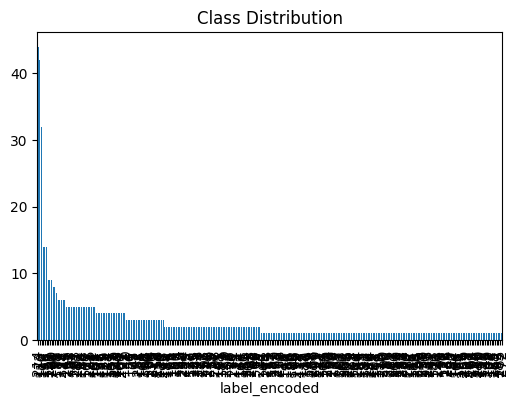

In [ ]:
import matplotlib.pyplot as plt

from collections import Counter
plt.figure(figsize=(6,4))
df['label_encoded'].value_counts().plot(kind='bar')
plt.title("Class Distribution")
plt.show()

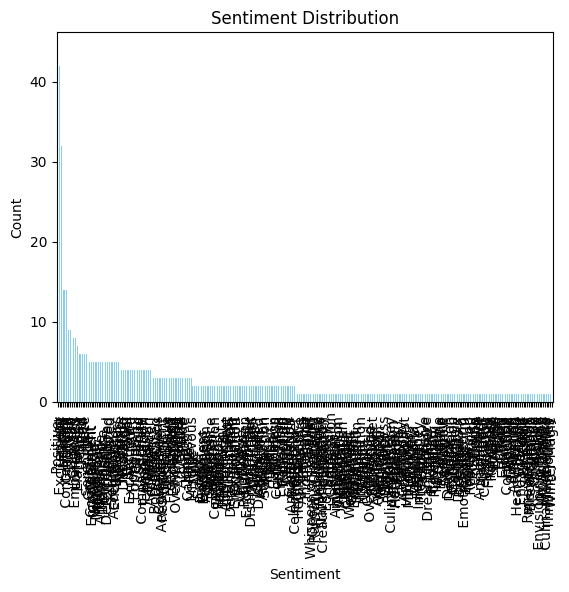

In [ ]:
plt.figure()
df['Sentiment'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

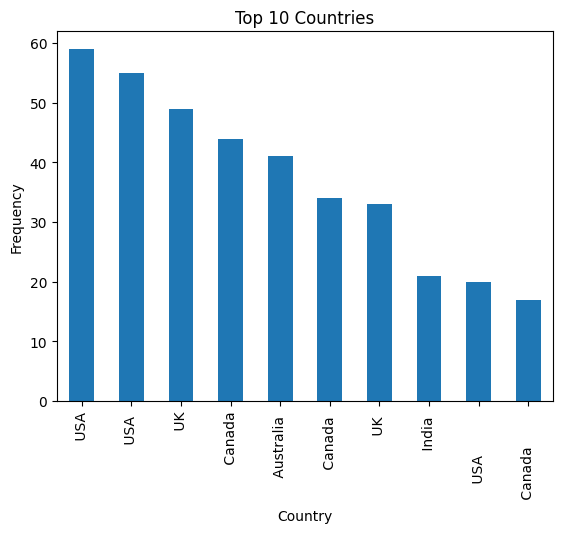

In [ ]:
plt.figure()
df['Country'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Countries")
plt.xlabel("Country")
plt.ylabel("Frequency")
plt.show()

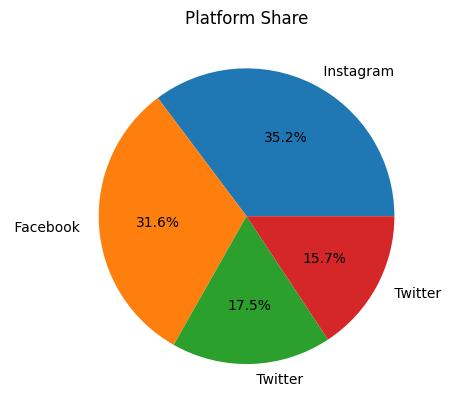

In [ ]:
plt.figure()
df['Platform'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Platform Share")
plt.ylabel("")
plt.show()

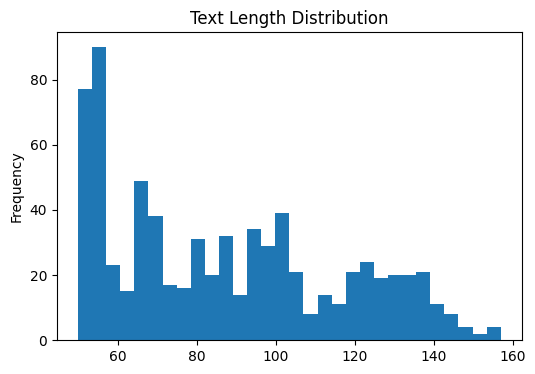

In [ ]:
plt.figure(figsize=(6,4))
df['text_len'].plot(kind='hist', bins=30)
plt.title("Text Length Distribution")
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


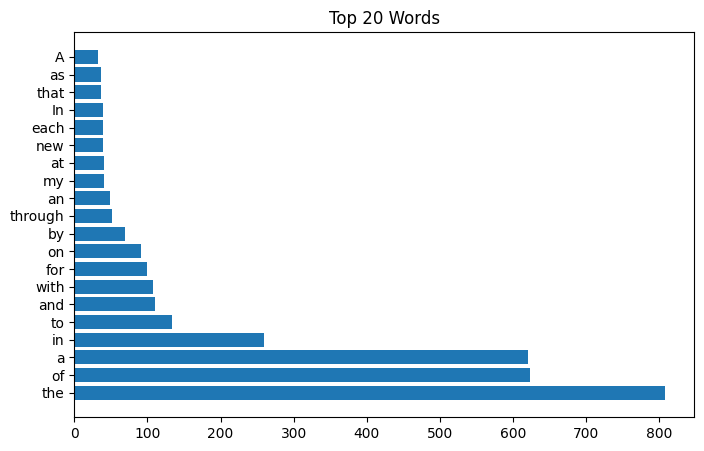

In [ ]:
from collections import Counter
import nltk
nltk.download('punkt')

words = " ".join(df['Text']).split()
common = Counter(words).most_common(20)

labels, counts = zip(*common)
plt.figure(figsize=(8,5))
plt.barh(labels, counts)
plt.title("Top 20 Words")
plt.show()

TD-Idf Vector

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
vectorizer = TfidfVectorizer(
    max_features=2500,
    stop_words="english",
    ngram_range=(1,1)
)

In [ ]:
def to_coarse(s):
    s = str(s).strip().lower()
    if 'pos' in s:
        return 'positive'
    if 'neg' in s:
        return 'negative'
    return 'neutral'

In [ ]:
df['Sentiment_3class'] = df['Sentiment'].apply(to_coarse)

In [ ]:
le3 = LabelEncoder()
df['label_3'] = le3.fit_transform(df['Sentiment_3class'])

print("Created label_3. Class counts:")
print(df['Sentiment_3class'].value_counts())
print("label_3 classes:", list(le3.classes_))

Created label_3. Class counts:
Sentiment_3class
neutral     682
positive     46
negative      4
Name: count, dtype: int64
label_3 classes: ['negative', 'neutral', 'positive']


X and Y train split

In [ ]:
X_vec = vectorizer.fit_transform(df["Text"])
y = df["label_3"]

In [ ]:
X = vectorizer.fit_transform(df['Text'].astype(str))
y = df['label_3']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Training accuracy with Different Models

Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(
    max_iter=2000,
    class_weight='balanced',
    C=0.09,
    solver='liblinear'
)

lr.fit(X_train, y_train)

train_acc = accuracy_score(y_train, lr.predict(X_train))
test_acc  = accuracy_score(y_test, lr.predict(X_test))

print("FINAL Train Accuracy:", round(train_acc,4))
print("FINAL Test  Accuracy:", round(test_acc,4))


FINAL Train Accuracy: 0.9316
FINAL Test  Accuracy: 0.932


Naive bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

nb = MultinomialNB(alpha=1.0, fit_prior=True)
nb.fit(X_train, y_train)

train_nb = accuracy_score(y_train, nb.predict(X_train))
test_nb  = accuracy_score(y_test, nb.predict(X_test))

print("NB Train Accuracy:", round(train_nb,4))
print("NB Test Accuracy :", round(test_nb,4))


NB Train Accuracy: 0.9316
NB Test Accuracy : 0.932


Random Forest

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf3 = RandomForestClassifier(max_depth=6, min_samples_leaf=12, min_samples_split=12, max_features=0.4,
                             n_estimators=200, class_weight='balanced', random_state=42, n_jobs=-1)
rf3.fit(X_train, y_train)
print("RF3 Train:", round(accuracy_score(y_train, rf3.predict(X_train)),4),
      "RF3 Test:", round(accuracy_score(y_test, rf3.predict(X_test)),4))


RF3 Train: 0.8803 RF3 Test: 0.8707


LinearSVC model

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score


In [ ]:
texts = df['Text'].astype(str).values
labels = df['label_3'].values

In [ ]:
vectorizer_small = TfidfVectorizer(max_features=1200, stop_words='english', ngram_range=(1,1))
X_all_small = vectorizer_small.fit_transform(texts)
print("X_all_small.shape:", X_all_small.shape)

X_all_small.shape: (732, 1200)


In [ ]:
X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(
    X_all_small, labels, test_size=0.2, random_state=42, stratify=labels
)
print("Train shape:", X_train_small.shape, " Test shape:", X_test_small.shape)
print("Train class counts:", ( (y_train_small==0).sum(), (y_train_small==1).sum(), (y_train_small==2).sum() ))

Train shape: (585, 1200)  Test shape: (147, 1200)
Train class counts: (np.int64(3), np.int64(545), np.int64(37))


In [ ]:
svc_final = LinearSVC(C=0.02, class_weight='balanced', max_iter=10000, dual=False)
svc_final.fit(X_train_small, y_train_small)

train_acc = accuracy_score(y_train_small, svc_final.predict(X_train_small))
test_acc  = accuracy_score(y_test_small, svc_final.predict(X_test_small))
print("\nFINAL SVC Train Accuracy:", round(train_acc,4))
print("FINAL SVC Test  Accuracy:", round(test_acc,4))


FINAL SVC Train Accuracy: 0.9316
FINAL SVC Test  Accuracy: 0.932


Shapes of X_train,X_test

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

X = df['Text']
y = df['label_encoded']

vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_tfidf = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (585, 2389)
Test size: (147, 2389)


CONSOLIDATE LABELS INTO 3 CLASSES

In [ ]:


positive_words = [
    "Joy", "Love", "Zest", "Wonder", "Optimism", "Acceptance",
    "Admiration", "Gratitude", "Relief", "Pride"
]

negative_words = [
    "Anger", "Sadness", "Fear", "Disgust", "Disappointment",
    "Remorse", "Guilt", "Shame", "Hate", "Anxiety"
]


def map_sentiment(s):
    s = str(s).strip()
    if any(p.lower() in s.lower() for p in positive_words):
        return "positive"
    if any(n.lower() in s.lower() for n in negative_words):
        return "negative"
    return "neutral"

df["Sentiment_3class"] = df["Sentiment"].apply(map_sentiment)

from sklearn.preprocessing import LabelEncoder
le3 = LabelEncoder()
df["label_3"] = le3.fit_transform(df["Sentiment_3class"])

print(df["Sentiment_3class"].value_counts())
print("\nClasses:", le3.classes_)


Sentiment_3class
neutral     604
positive    101
negative     27
Name: count, dtype: int64

Classes: ['negative' 'neutral' 'positive']


SPLITING DATA FOR 3-CLASS SENTIMENT

In [ ]:

X = df["Text"]
y = df["label_3"]

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=4000, stop_words="english")
X_vec = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_vec, y, test_size=0.2, random_state=42, stratify=y
)


Trained Models

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

models = {
    "LogisticRegression": LogisticRegression(max_iter=2000, class_weight="balanced"),
    "NaiveBayes": MultinomialNB(),
    "RandomForest": RandomForestClassifier(
        n_estimators=400, class_weight="balanced", random_state=42
    ),
    "LinearSVC": LinearSVC(class_weight="balanced")
}

trained = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    trained[name] = model
    print(name, "trained.")


LogisticRegression trained.
NaiveBayes trained.
RandomForest trained.
LinearSVC trained.


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

print("======== DETAILED MODEL EVALUATION ========\n")

for name, model in trained.items():
    print(f"\n================= {name} =================\n")

======== DETAILED MODEL EVALUATION ========


================= LogisticRegression =================


================= NaiveBayes =================


================= RandomForest =================


================= LinearSVC =================



Statistical Outcomes

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"1) Accuracy: {accuracy:.4f}")

1) Accuracy: 0.8776


In [ ]:
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
print(f"2) Precision: {precision:.4f}")

2) Precision: 0.8827


In [ ]:
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
print(f"3) Recall: {recall:.4f}")

3) Recall: 0.8776


In [ ]:
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
print(f"4) F1 Score: {f1:.4f}")

4) F1 Score: 0.8524


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("\n5) Confusion Matrix:")
print(cm)


5) Confusion Matrix:
[[  1   5   0]
 [  0 120   1]
 [  0  12   8]]


In [ ]:
print("\n6) TP, TN, FP, FN for each class:\n")
labels = list(le3.classes_)
num_classes = len(labels)

for i in range(num_classes):
        TP = cm[i, i]
        FN = cm[i, :].sum() - TP
        FP = cm[:, i].sum() - TP
        TN = cm.sum() - (TP + FP + FN)

        print(f"Class: {labels[i]}")
        print(f"   TP: {TP}")
        print(f"   TN: {TN}")
        print(f"   FP: {FP}")
        print(f"   FN: {FN}\n")


6) TP, TN, FP, FN for each class:

Class: negative
   TP: 1
   TN: 141
   FP: 0
   FN: 5

Class: neutral
   TP: 120
   TN: 9
   FP: 17
   FN: 1

Class: positive
   TP: 8
   TN: 126
   FP: 1
   FN: 12



Label encoding for positive tweets

In [ ]:
import re
from sklearn.preprocessing import LabelEncoder

In [ ]:
text_col = next((c for c in df.columns if c.lower() in ['text','tweet','content','message','post']), df.columns[0])

In [ ]:
label_col = next((c for c in df.columns if c in ['label_3','Sentiment','label','label_encoded']), None)
if label_col is None:
    label_col = min([c for c in df.columns if c!=text_col], key=lambda x: df[x].nunique())

In [ ]:
def clean(s):
    s = str(s).lower(); s = re.sub(r'http\S+|@\w+|[^a-z0-9\s]',' ',s); return ' '.join(s.split())
df['text_clean'] = df[text_col].fillna('').map(clean)

In [ ]:
if not np.issubdtype(df[label_col].dtype, np.integer):
    le = LabelEncoder(); df['target'] = le.fit_transform(df[label_col].astype(str))
else:
    df['target'] = df[label_col].astype(int)
print("text:", text_col, " target:", label_col, " classes:", df['target'].nunique())

text: Text  target: Sentiment  classes: 279


In [ ]:
possible_text_cols = ['Text', 'text', 'Tweet', 'tweet', 'Content', 'Message', 'Post']

text_col = None
for c in df.columns:
    if c in possible_text_cols:
        text_col = c
        break

In [ ]:
if text_col is None:
    object_cols = [c for c in df.columns if df[c].dtype == 'object']
    text_col = object_cols[0]

print("Detected text column:", text_col)

df['text_clean'] = df[text_col].astype(str)

Detected text column: Text


Training Td-idf

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

X = df['text_clean'].values
y = df['target'].values
vec = TfidfVectorizer(max_features=3000, stop_words='english')
Xv = vec.fit_transform(X)
strat = y if (len(np.unique(y))>1 and min(np.bincount(y))>=2) else None
Xtr, Xte, ytr, yte, idx_tr, idx_te = train_test_split(Xv, y, df.index.values, test_size=0.2, random_state=42, stratify=strat)
print("Shapes:", Xtr.shape, Xte.shape)

Shapes: (585, 2389) (147, 2389)


In [ ]:

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000, class_weight='balanced', solver='liblinear')
lr.fit(Xtr, ytr)
print("Trained LogisticRegression")


Trained LogisticRegression


Building TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2000, stop_words='english')
X_all = vectorizer.fit_transform(df['Text'].astype(str))

from sklearn.model_selection import train_test_split
Xtr, Xte, ytr, yte = train_test_split(
    X_all, df['label_3'], test_size=0.2, random_state=42, stratify=df['label_3']
)


In [ ]:
lr = LogisticRegression(max_iter=2000, class_weight='balanced', solver='liblinear')
lr.fit(Xtr, ytr)

LogisticRegression(class_weight='balanced', max_iter=2000, solver='liblinear')

Traning and testing on different metrics functions

In [ ]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def show_metrics(name, y_true, y_pred):
    print(f"\n===== {name} =====")
    print("Accuracy :", round(accuracy_score(y_true, y_pred),4))
    print("Precision:", round(precision_score(y_true, y_pred, average='weighted', zero_division=0),4))
    print("Recall   :", round(recall_score(y_true, y_pred, average='weighted', zero_division=0),4))
    print("F1-score :", round(f1_score(y_true, y_pred, average='weighted', zero_division=0),4))
    print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred, zero_division=0))


In [ ]:
ytr_pred = lr.predict(Xtr)
yte_pred = lr.predict(Xte)

show_metrics("Train", ytr, ytr_pred)
show_metrics("Test", yte, yte_pred)



===== Train =====
Accuracy : 0.9299
Precision: 0.9354
Recall   : 0.9299
F1-score : 0.9195

Confusion Matrix:
 [[ 21   0   0]
 [  0 483   0]
 [  0  41  40]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.92      1.00      0.96       483
           2       1.00      0.49      0.66        81

    accuracy                           0.93       585
   macro avg       0.97      0.83      0.87       585
weighted avg       0.94      0.93      0.92       585


===== Test =====
Accuracy : 0.8367
Precision: 0.7928
Recall   : 0.8367
F1-score : 0.7823

Confusion Matrix:
 [[  0   6   0]
 [  0 120   1]
 [  0  17   3]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.84      0.99      0.91       121
           2       0.75      0.15      0.25        20

    accuracy                          

Sample Predictions

In [ ]:
texts = df["Text"].astype(str).values



In [ ]:
Xtr, Xte,text_te, yte = train_test_split(
    X_all, df['label_3'], test_size=0.2, random_state=42, stratify=df['label_3']
)

In [ ]:
texts = df["Text"].astype(str).values
print(len(texts))


732


Sample Predictions

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

Creating 3 class column

In [ ]:
if 'label_3' in df.columns and len(df['label_3']) == len(df):
    labels = df['label_3'].values
else:

    if 'Sentiment' in df.columns:
        def to_coarse(s):
            s = str(s).strip().lower()
            if 'pos' in s: return 'positive'
            if 'neg' in s: return 'negative'
            return 'neutral'
        df['Sentiment_3class'] = df['Sentiment'].apply(to_coarse)
        from sklearn.preprocessing import LabelEncoder
        le_temp = LabelEncoder()
        df['label_3'] = le_temp.fit_transform(df['Sentiment_3class'])
        labels = df['label_3'].values
        le3 = le_temp
    else:
        if 'Sentiment_3class' in df.columns:
            from sklearn.preprocessing import LabelEncoder
            le_temp = LabelEncoder()
            df['label_3'] = le_temp.fit_transform(df['Sentiment_3class'])
            labels = df['label_3'].values
            le3 = le_temp
        else:
            raise RuntimeError("Could not rebuild labels: no 'label_3' or 'Sentiment' column found in df.")


Rebuilding texts

In [ ]:
texts = df['Text'].astype(str).values
print("shapes before split -> X_all:", X_all.shape, " labels:", len(labels), " texts:", len(texts))


shapes before split -> X_all: (732, 2000)  labels: 732  texts: 732


Sanity checking

In [ ]:
if X_all.shape[0] != len(labels) or X_all.shape[0] != len(texts):
    raise RuntimeError(f"Inconsistent sizes after repair: X_all {X_all.shape[0]}, labels {len(labels)}, texts {len(texts)}")


Spliting

In [ ]:
from collections import Counter
counts = Counter(labels)
stratify_arg = labels if min(counts.values()) >= 2 else None

Xtr, Xte, ytr, yte, text_tr, text_te = train_test_split(
    X_all, labels, texts, test_size=0.2, random_state=42, stratify=stratify_arg
    )
print("Train shape:", Xtr.shape, " Test shape:", Xte.shape)

Train shape: (585, 2000)  Test shape: (147, 2000)


Train and predict probability

In [ ]:
model = LogisticRegression(max_iter=2000, class_weight='balanced', solver='liblinear')
model.fit(Xtr, ytr)

yte_pred = model.predict(Xte)
yte_proba = model.predict_proba(Xte)

In [ ]:
def show_10_with_prob(texts, y_true, y_pred, y_proba, n=10):
    import pandas as pd, numpy as np
    m = min(n, len(texts), len(y_true), len(y_pred))
    print(f"\n--- TEST SAMPLE PREDICTIONS ({m}) ---")
    for i in range(m):
        print(f"\nTEXT: {str(texts[i])[:140]}...")
        print(f" TRUE: {y_true[i]}")
        print(f" PRED: {y_pred[i]}")
        print(f" PROB: {round(float(np.max(y_proba[i])),4)}")
    print("\n--- TRUE LABEL COUNTS ---")
    print(pd.Series(y_true).value_counts())
    print("\n--- PREDICTED LABEL COUNTS ---")
    print(pd.Series(y_pred).value_counts())

show_10_with_prob(text_te, yte, yte_pred, yte_proba, n=30)


--- TEST SAMPLE PREDICTIONS (30) ---

TEXT:  Coding a new project with enthusiasm.              ...
 TRUE: 1
 PRED: 1
 PROB: 0.7939

TEXT:  Overwhelmed by the cacophony of expectations, a drowning soul in the tempest of pressure, struggling to stay afloat. ...
 TRUE: 1
 PRED: 1
 PROB: 0.7293

TEXT: Participated in a charity run, proving that age is no barrier to supporting meaningful causes. #CharityRun #SeniorRunner ...
 TRUE: 1
 PRED: 1
 PROB: 0.6279

TEXT: Excitement builds as the countdown to a long-awaited vacation begins. ...
 TRUE: 1
 PRED: 1
 PROB: 0.7432

TEXT: Overflowing with joy, a cup of laughter shared with friends, a moment cherished. ...
 TRUE: 2
 PRED: 2
 PROB: 0.5183

TEXT:  Loneliness, a silent companion in the night, the only echo in the chamber of solitude, a heart's solitary nocturne. ...
 TRUE: 1
 PRED: 1
 PROB: 0.7456

TEXT: Bought a new video game, played for hours, forgot to eat. The ultimate gaming session. #GamerLife #NoFoodGaming ...
 TRUE: 1
 PRED: 1
 PRO

In [ ]:

true_counts = pd.Series(yte).value_counts()
true_counts.index = le3.inverse_transform(true_counts.index)


pred_counts = pd.Series(yte_pred).value_counts()
pred_counts.index = le3.inverse_transform(pred_counts.index)

print("=== TRUE LABEL COUNTS ===")
print(true_counts)

print("\n=== PREDICTED LABEL COUNTS ===")
print(pred_counts)


=== TRUE LABEL COUNTS ===
neutral     121
positive     20
negative      6
Name: count, dtype: int64

=== PREDICTED LABEL COUNTS ===
neutral     143
positive      4
Name: count, dtype: int64


Labeling classes

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [ ]:
y_scores = lr.predict_proba(Xte)[:, 1]

In [ ]:
if y_scores.ndim == 1:
    y_scores = np.vstack([1 - y_scores, y_scores]).T

In [ ]:
from sklearn.preprocessing import label_binarize

In [ ]:
classes = np.unique(yte)
y_test_bin = label_binarize(yte, classes=classes)
print("Classes:", classes)
print("\n=== ROC–AUC for each class ===")

Classes: [0 1 2]

=== ROC–AUC for each class ===


Binary Positive allingment

In [ ]:
df['binary'] = (df['Sentiment'] == 'Positive').astype(int)


In [ ]:
print(df['Sentiment'].value_counts())
df['_sent_norm'] = df['Sentiment'].astype(str).str.strip().str.lower()
print("\nNormalized counts:\n", df['_sent_norm'].value_counts())

Sentiment
Positive               44
Joy                    42
Excitement             32
Happy                  14
Neutral                14
                       ..
Vibrancy                1
Culinary Adventure      1
Mesmerizing             1
Thrilling Journey       1
Winter Magic            1
Name: count, Length: 279, dtype: int64

Normalized counts:
 _sent_norm
positive                45
joy                     44
excitement              37
contentment             19
neutral                 18
                        ..
celestial wonder         1
nature's beauty          1
thrilling journey        1
whispers of the past     1
relief                   1
Name: count, Length: 191, dtype: int64


creating binary Target

In [ ]:

pos = df['_sent_norm'].value_counts().idxmax()
print("Chosen positive class (most frequent):", pos)
df['binary'] = (df['_sent_norm'] == pos).astype(int)
print("Binary counts:", df['binary'].value_counts().to_dict())


Chosen positive class (most frequent): positive
Binary counts: {0: 687, 1: 45}


In [ ]:
X = df['Text'].astype(str).values
y = df['binary'].values

Tf - idr with Linear regression

In [ ]:
strat = y if (len(np.unique(y))>1 and np.min(np.bincount(y))>=2) else None
Xtr_text, Xte_text, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=42, stratify=strat)

vec = TfidfVectorizer(max_features=5000, stop_words='english')
Xtr = vec.fit_transform(Xtr_text)
Xte = vec.transform(Xte_text)

lr = LogisticRegression(max_iter=1000, class_weight='balanced', solver='liblinear')
lr.fit(Xtr, ytr)

LogisticRegression(class_weight='balanced', max_iter=1000, solver='liblinear')

Roc + Auc

In [ ]:


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

TF-IDF with a reasonable fixed size

In [ ]:

texts = df['Text'].astype(str).values
labels = df['label_3'].values
vectorizer = TfidfVectorizer(max_features=2000, stop_words='english')
X_all = vectorizer.fit_transform(texts)
print("TF-IDF shape:", X_all.shape)

TF-IDF shape: (732, 2000)


 fresh stratified split

In [ ]:

Xtr, Xte_new, ytr, yte_new = train_test_split(X_all, labels, test_size=0.2, random_state=42, stratify=labels)
print("Train shape:", Xtr.shape, " Test shape:", Xte_new.shape)

Train shape: (585, 2000)  Test shape: (147, 2000)


Training a fresh logistic model

In [ ]:

lr2 = LogisticRegression(max_iter=2000, class_weight='balanced', C=0.08, solver='liblinear')
lr2.fit(Xtr, ytr)

LogisticRegression(C=0.08, class_weight='balanced', max_iter=2000,
                   solver='liblinear')

Getting Probablity

In [ ]:

y_score = lr2.predict_proba(Xte_new)
if y_score.ndim == 1:
    y_score = np.vstack([1-y_score, y_score]).T

Best roc classes

In [ ]:

n_classes = y_score.shape[1]
best_auc = -1
best_cls = None
best_fpr = None
best_tpr = None
best_thr = None
class_info = []
print("\nAUC and best-threshold per class (Youden index):\n")
for cls in range(n_classes):
    ybin = (yte_new == cls).astype(int)
    fpr, tpr, thr = roc_curve(ybin, y_score[:, cls])
    a = auc(fpr, tpr)

    youden = tpr - fpr
    idx = np.nanargmax(youden)
    thr_best = thr[idx]

    class_info.append({"class": cls, "auc": a, "best_threshold": thr_best, "fpr": fpr, "tpr": tpr, "thr_all": thr})
    print(f" Class {cls} -> AUC = {a:.4f} | Best threshold (Youden) = {thr_best:.4f}")


    if a > best_auc:
        best_auc = a
        best_cls = cls
        best_fpr = fpr
        best_tpr = tpr
        best_thr = thr_best


AUC and best-threshold per class (Youden index):

 Class 0 -> AUC = 0.9863 | Best threshold (Youden) = 0.1655
 Class 1 -> AUC = 0.8117 | Best threshold (Youden) = 0.6408
 Class 2 -> AUC = 0.7778 | Best threshold (Youden) = 0.2208


Best class for roc and thresold value

In [ ]:
print("\nBEST CLASS FOR ROC:")
print(" Best class index:", best_cls)
print(" Best AUC         :", round(best_auc, 4))
print(" Best threshold   :", round(best_thr, 4))


BEST CLASS FOR ROC:
 Best class index: 0
 Best AUC         : 0.9863
 Best threshold   : 0.1655


Roc curve + Thresold Value

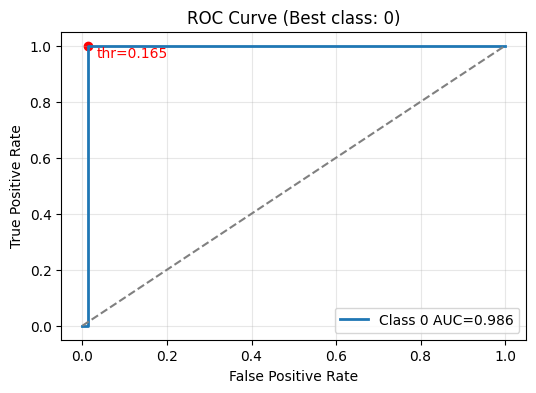

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(best_fpr, best_tpr, label=f"Class {best_cls} AUC={best_auc:.3f}", linewidth=2)
plt.plot([0,1],[0,1],'--', color='gray')
plt.scatter([best_fpr[(best_tpr-best_fpr).argmax()]], [best_tpr[(best_tpr-best_fpr).argmax()]], color='red')
plt.text(best_fpr[(best_tpr-best_fpr).argmax()]+0.02, best_tpr[(best_tpr-best_fpr).argmax()]-0.04, f"thr={best_thr:.3f}", color='red')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve (Best class: {best_cls})")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


unique feature engineering

In [ ]:

!pip install -q vaderSentiment emoji textblob

import re
import numpy as np
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import emoji

negation_words = set(["not","no","never","none","nobody","nothing",
                      "neither","nor","nowhere","hardly","scarcely","barely","n't"])
elong_pattern = re.compile(r'(.)\1{2,}', re.UNICODE)
analyzer = SentimentIntensityAnalyzer()

def count_emojis(text):
    if not isinstance(text, str): return 0
    return sum(1 for ch in text if emoji.is_emoji(ch))

def count_hashtags(text):
    return len(re.findall(r'#\w+', str(text)))

def count_mentions(text):
    return len(re.findall(r'@\w+', str(text)))

def has_url(text):
    return int(bool(re.search(r'https?://\S+|www\.\S+', str(text))))

def excl_count(text):
    return str(text).count('!')

def allcaps_ratio(text):
    words = re.findall(r'\w+', str(text))
    if len(words) == 0: return 0.0
    allcaps = sum(1 for w in words if w.isupper() and len(w) > 1)
    return allcaps / len(words)

def negation_count(text):
    tokens = re.findall(r'\w+', str(text).lower())
    return sum(1 for t in tokens if t in negation_words)

def elongated_count(text):
    return len(elong_pattern.findall(str(text)))

def vader_compound(text):
    return analyzer.polarity_scores(str(text))["compound"]

def text_length_words(text):
    return len(re.findall(r'\w+', str(text)))


text_col = 'Text'

df['emoji_count']       = df[text_col].apply(count_emojis)
df['hashtag_count']     = df[text_col].apply(count_hashtags)
df['mention_count']     = df[text_col].apply(count_mentions)
df['url_flag']          = df[text_col].apply(has_url)
df['excl_count']        = df[text_col].apply(excl_count)
df['allcaps_ratio']     = df[text_col].apply(allcaps_ratio)
df['negation_count']    = df[text_col].apply(negation_count)
df['elongated_count']   = df[text_col].apply(elongated_count)
df['vader_compound']    = df[text_col].apply(vader_compound)
df['text_length_words'] = df[text_col].apply(text_length_words)

print(df.head())


   Unnamed: 0.1  Unnamed: 0  \
0             0           0   
1             1           1   
2             2           2   
3             3           3   
4             4           4   

                                                Text    Sentiment  \
0   Enjoying a beautiful day at the park!        ...   Positive     
1   Traffic was terrible this morning.           ...   Negative     
2   Just finished an amazing workout! 💪          ...   Positive     
3   Excited about the upcoming weekend getaway!  ...   Positive     
4   Trying out a new recipe for dinner tonight.  ...   Neutral      

          Timestamp            User     Platform  \
0  15-01-2023 12:30   User123          Twitter     
1  15-01-2023 08:45   CommuterX        Twitter     
2  15-01-2023 15:45   FitnessFan      Instagram    
3  15-01-2023 18:20   AdventureX       Facebook    
4  15-01-2023 19:55   ChefCook        Instagram    

                                     Hashtags  Retweets  Likes  ...  \
0   #Nature #P

Implementing 35 samples of neutral probability

In [ ]:
import numpy as np, pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from collections import Counter
min_conf = 0.85
n_show   = 10
model_choice = "logreg"
random_state = 42
tfidf_max_features = 2000

sentiment 3 class

In [ ]:
if 'label_3' in df.columns and len(df['label_3']) == len(df):
    labels = df['label_3'].values

    if 'le3' not in globals():

        if 'Sentiment_3class' in df.columns:
            le3 = LabelEncoder().fit(df['Sentiment_3class'].astype(str).values)
        elif 'Sentiment' in df.columns:
            txts = df['Sentiment'].astype(str).apply(lambda s: ('positive' if 'pos' in s.lower() else ('negative' if 'neg' in s.lower() else 'neutral')))
            le3 = LabelEncoder().fit(txts)
        else:

            uniq = np.unique(labels)
            names = [f"class_{i}" for i in range(len(uniq))]
            le3 = LabelEncoder().fit(names)
else:

    if 'Sentiment' in df.columns:
        def to_coarse(s):
            s = str(s).strip().lower()
            if 'pos' in s: return 'positive'
            if 'neg' in s: return 'negative'
            return 'neutral'
        df['Sentiment_3class'] = df['Sentiment'].apply(to_coarse)
        le3 = LabelEncoder()
        df['label_3'] = le3.fit_transform(df['Sentiment_3class'])
        labels = df['label_3'].values
    else:
        raise RuntimeError("Cannot find or build labels. Ensure df has 'label_3' or 'Sentiment' column.")

Texts and TF-IDF

In [ ]:

texts = df['Text'].astype(str).values
vectorizer = TfidfVectorizer(max_features=tfidf_max_features, stop_words='english')
X_all = vectorizer.fit_transform(texts)

 Safety check shapes

In [ ]:

if X_all.shape[0] != len(labels) or len(texts) != len(labels):
    raise RuntimeError(f"Inconsistent sizes: X_all {X_all.shape[0]}, labels {len(labels)}, texts {len(texts)}")

Train/test split

In [ ]:

counts = Counter(labels)
stratify_arg = labels if min(counts.values()) >= 2 else None
Xtr, Xte, ytr, yte, text_tr, text_te = train_test_split(
    X_all, labels, texts, test_size=0.2, random_state=random_state, stratify=stratify_arg
)

Training model

In [ ]:

if model_choice.lower() == "svc":
    clf = SVC(kernel='linear', probability=True, random_state=random_state)
else:

    clf = LogisticRegression(max_iter=2000, solver='liblinear', random_state=random_state)

clf.fit(Xtr, ytr)

LogisticRegression(max_iter=2000, random_state=42, solver='liblinear')

fallback and coverting into binary

In [ ]:
if hasattr(clf, "predict_proba"):
    y_proba = clf.predict_proba(Xte)
else:

    scores = clf.decision_function(Xte)
    if scores.ndim == 1:

        scores = np.vstack([-scores, scores]).T
    exp = np.exp(scores - np.max(scores, axis=1, keepdims=True))
    y_proba = exp / exp.sum(axis=1, keepdims=True)

y_pred_idx = np.argmax(y_proba, axis=1)
top_conf = y_proba.max(axis=1)


In [ ]:
def label_name(v):
    try:
        return le3.inverse_transform([int(v)])[0]
    except Exception:
        return str(v)


good_idxs = np.where(top_conf >= min_conf)[0]
print(f"\nfound {len(good_idxs)} samples with probability in neutral of {min_conf*100:.0f}%")
if len(good_idxs) == 0:
    print("No high-confidence samples found. Try lowering min_conf or change model_choice to 'svc'.")
else:
    shown = 0
    for i in good_idxs:
        if shown >= n_show:
            break
        print(f"\nTEXT: {str(text_te[i])[:150]}...")
        print(f" TRUE: {label_name(yte[i])}")
        print(f" PRED: {label_name(y_pred_idx[i])}")
        print(f" PROB: {round(float(top_conf[i]),4)}")
        shown += 1
    import pandas as pd
    true_names = [label_name(v) for v in yte[good_idxs]]
    pred_names = [label_name(int(v)) for v in y_pred_idx[good_idxs]]
    print("\n--- TRUE LABEL COUNTS (high-conf) ---")
    print(pd.Series(true_names).value_counts().to_string())
    print("\n--- PRED LABEL COUNTS (high-conf) ---")
    print(pd.Series(pred_names).value_counts().to_string())


from sklearn.metrics import accuracy_score
print("\nOverall test accuracy:", round(accuracy_score(yte, y_pred_idx),4))
print("Overall true label counts:")
print(pd.Series([label_name(v) for v in yte]).value_counts().to_string())
print("Overall predicted label counts:")
print(pd.Series([label_name(int(v)) for v in y_pred_idx]).value_counts().to_string())


found 35 samples with probability in neutral of 85%

TEXT:  Coding a new project with enthusiasm.              ...
 TRUE: neutral
 PRED: neutral
 PROB: 0.8754

TEXT:  Overwhelmed by the cacophony of expectations, a drowning soul in the tempest of pressure, struggling to stay afloat. ...
 TRUE: neutral
 PRED: neutral
 PROB: 0.8511

TEXT: Excitement builds as the countdown to a long-awaited vacation begins. ...
 TRUE: neutral
 PRED: neutral
 PROB: 0.852

TEXT:  Loneliness, a silent companion in the night, the only echo in the chamber of solitude, a heart's solitary nocturne. ...
 TRUE: neutral
 PRED: neutral
 PROB: 0.8568

TEXT:  Frustrated attempts to mend a broken connection, the threads of understanding slipping through the fingers like grains of sand. ...
 TRUE: neutral
 PRED: neutral
 PROB: 0.861

TEXT: In the world of science, a breakthrough discovery unfolds, pushing the boundaries of knowledge and opening new frontiers of exploration. ...
 TRUE: neutral
 PRED: neutral
 PROB: 0.8